<a href="https://colab.research.google.com/github/VaibhavKumar2005/AI-ML-Journey-Repo-/blob/main/ML3(Boston_Housing_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏠 Boston Housing Price Prediction with Linear Regression

This Colab notebook demonstrates how to apply **Linear Regression** to the **Boston Housing dataset**.

We will:
- Load and inspect the dataset
- Handle missing values
- Train a Linear Regression model
- Evaluate the model with Mean Squared Error and R² Score
- Visualize predictions
- Analyze relationships between each feature and the target (`MEDV`)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.impute import SimpleImputer

## 📁 Upload the Housing Dataset

Please upload the `HousingData.csv` file to continue.


In [ ]:
df = pd.read_csv('/content/HousingData.csv')
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 🔍 Check for Missing Values

We'll verify whether any columns contain missing data and address them accordingly.


In [ ]:
missing_values = df.isnull().sum()

In [ ]:
print(missing_values)


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


## 🧼 Preprocessing

We’ll now:
- Separate features (`X`) and the target (`y`)
- Impute any missing values in features using the mean


In [ ]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [ ]:
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

## 🔀 Train/Test Split

Split the dataset into training and testing sets (80/20 split).


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 🤖 Train the Linear Regression Model


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 📊 Evaluate the Model

We will predict on the test data and calculate:
- Mean Squared Error (MSE)
- R² Score


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 25.01767202384265
R² Score: 0.6588520195508147


## 📉 Actual vs Predicted Prices

This scatter plot shows how close the predictions are to the actual house prices.


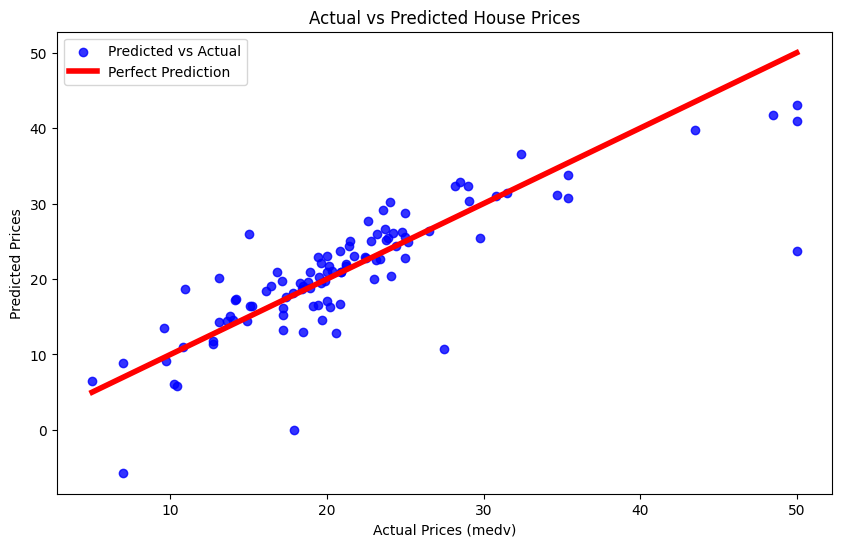

In [ ]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.8, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=4, label="Perfect Prediction")
plt.xlabel("Actual Prices (medv)")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()

## 📈 Feature-wise Linear Regression

We’ll fit a separate simple linear regression model for each feature individually and visualize its relationship with `MEDV`.


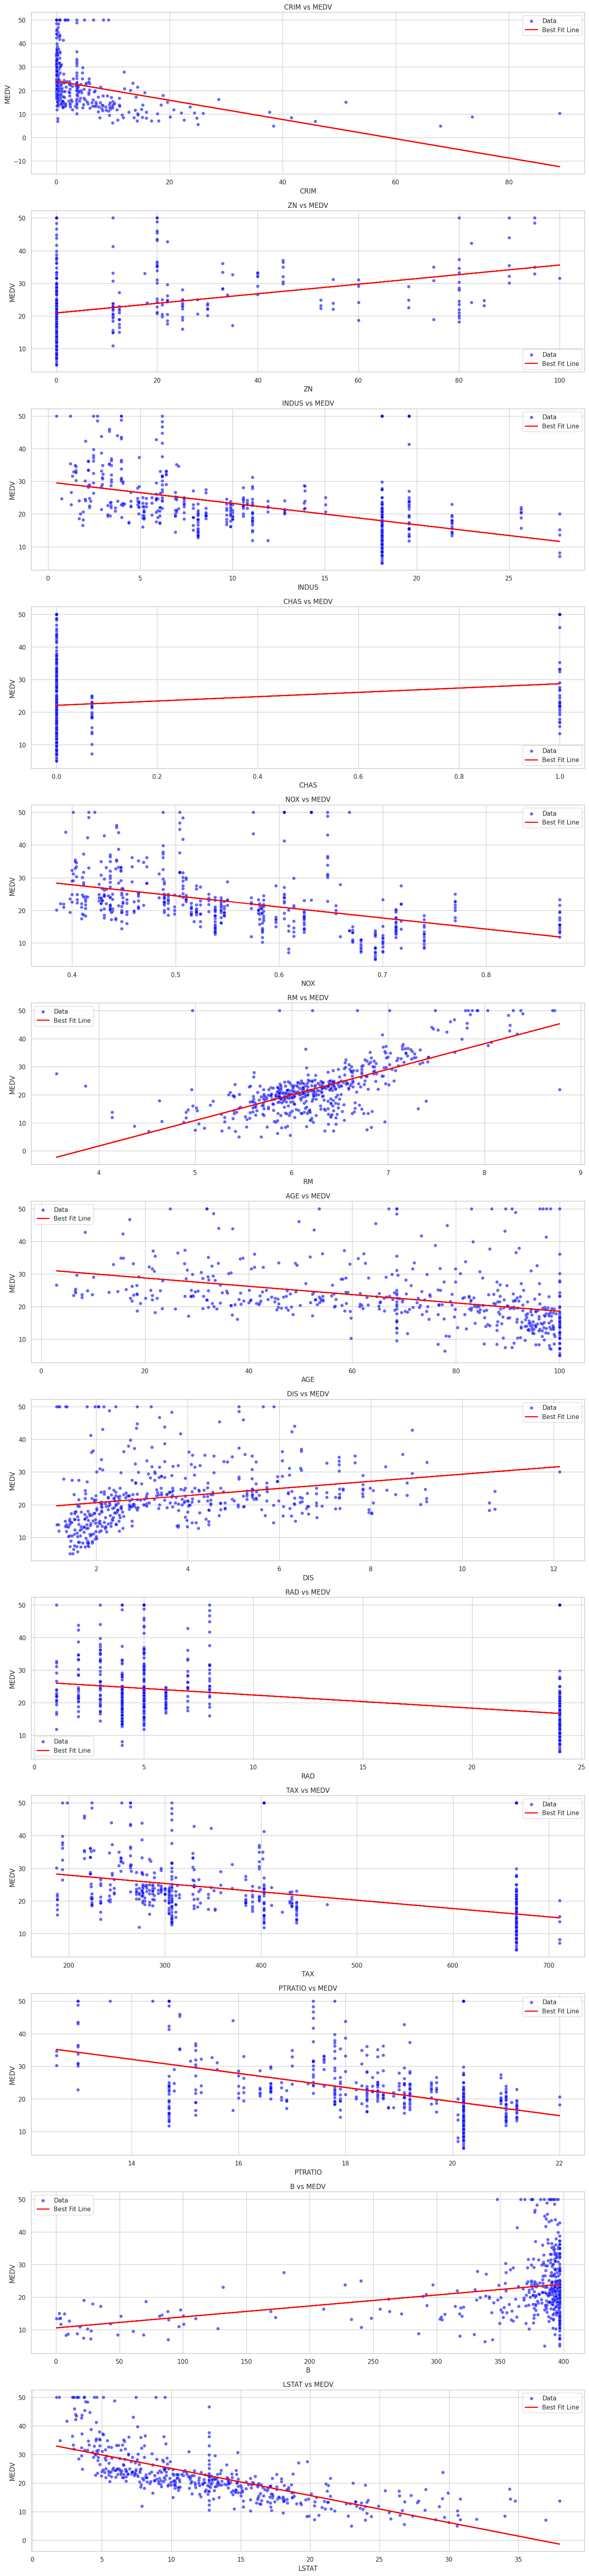

In [ ]:
# List of features (exclude the target)
features = df.columns.drop('MEDV')

# Set up the plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5 * len(features)))

for i, feature in enumerate(features):
    X_feat = df[[feature]].values
    y_target = df['MEDV'].values

    imputer = SimpleImputer(strategy="mean")
    X_feat_imputed = imputer.fit_transform(X_feat)

    model = LinearRegression()
    model.fit(X_feat_imputed, y_target)
    y_line = model.predict(X_feat_imputed)

    # Plot
    plt.subplot(len(features), 1, i + 1)
    sns.scatterplot(x=X_feat_imputed.flatten(), y=y_target, alpha=0.6, color="blue", label="Data")
    plt.plot(X_feat_imputed, y_line, color='red', linewidth=2, label="Best Fit Line")
    plt.xlabel(feature)
    plt.ylabel("MEDV")
    plt.title(f"{feature} vs MEDV")
    plt.legend()

plt.tight_layout()
plt.show()

## ✅ Conclusion

- We successfully trained a **Linear Regression** model on the Boston housing dataset.
- Model evaluation showed a good correlation between predicted and actual values.
- Feature-wise regression lines helped us understand the linear relationships between each feature and the target price (`MEDV`).

Next steps you could explore:
- Try feature scaling or normalization
- Apply polynomial regression or regularization (Ridge/Lasso)
- Test more advanced models like Random Forests or XGBoost
